# HW11

### Jingheng Huan
jh730

Q1: Perform both the Kruskal’s and Prim’s algorithms on the following graph.
Show your solutions step by step.

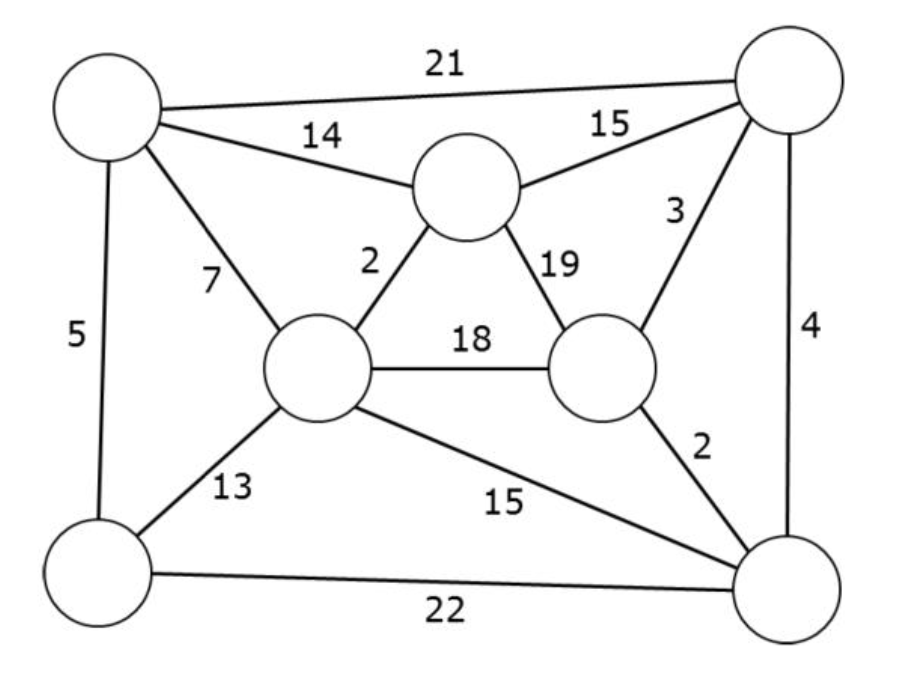

In [1]:
from IPython.display import Image, display

display(Image(filename='HW11Q1.png'))

# Kruskal's Algorithm

1. **Sort the edges by ascending weights:**
   - The edges sorted by weight are: (3-2), (4-2), (7-2), (5-7), (5-13), (2-15), (2-18), (3-15), (13-22), and (14-21).
   
2. **Building the MST with sorted edges:**
   - **Step 1**: Add the smallest edge (3-2) to the MST.
   - **Step 2**: We can't add Edge (4-2), which form a cycle.
   - **Step 3**: The next edge (7-2) is also added since it does not create a cycle.
   - **Step 4**: Edge (5-7) is added next, still no cycle.
   - **Step 5**: We can't add Edge (5-13), which form a cycle.
   - **Step 6**: The next edge (2-15) is added since it does not create a cycle.
   - **Step 7**: We can't add Edge (2-18), which form a cycle.
   - **Step 8**: We have now reached the required number of edges for the MST, which is (7-1), where 7 is the number of vertices. Therefore, we do not need to consider other edges.

3. **The resulting edges of the MST using Kruskal's Algorithm:**
   - The MST contains the edges: (3-2), (7-2), (5-7), (2-15).

# Prim's Algorithm

- **Starting at the vertex on the top left**:
  - **Step 1**: Choose edge (5-7), the smallest connecting edge.
  - **Step 2**: Add edge (7-2), connecting new vertices with minimal weights.
  - **Step 3**: Add edge (2-15), connecting new vertices with minimal weights. 
  - **Step 4**: Add edge (15-3), connecting new vertices with minimal weights. 
  - **Step 5**: Add edge (3-2), connecting new vertices with minimal weights.

- **Result**: The edges in the minimum spanning tree using Prim's algorithm are (5-7), (7-2), (2-15), (15-3), and (3-2).

Q2: Introduce a linear running time algorithm for finding MSTs on any
undirected graph with only two weight options, either w = 10 or w = 20.

Q3: Implement the Bellman-Ford algorithm using an array list. Test your
implementation with at least 3 shortest path problem instances, you come up with.

Q4: Dis/-prove that the Dijkstra’s algorithm results in a shortest path tree
which is always an MST.

Q5: Suggest an approach utilizing Breadth-First Search (BFS), that can explore
the shortest paths as the Dijkstra’s algorithm does.